## Effect of Weather on road collision 


## Import Libraries

In [83]:
# Import libraries 
%matplotlib inline
import pandas as PandaLib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn import tree
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import math as mt
from collections import Counter
import pydotplus

from scipy import misc
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
#we have to install ggplot through pip install

from sklearn.preprocessing import label_binarize
from sklearn import *
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
%config IPCompleter.greedy=True

In [18]:

#Change the path if not executing 
OpenFile  = PandaLib.read_csv('Traffic_data.csv',low_memory='False')
#Convert to dataframe 
TrafficData = PandaLib.DataFrame(OpenFile)
TrafficData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297612 entries, 0 to 297611
Data columns (total 22 columns):
Year                           297612 non-null int64
Collision_Month                297612 non-null object
Day_of_the_week                297612 non-null object
Collision_Hour                 297612 non-null object
Collision_Severe               297612 non-null int64
No_of_vehicles_in_collision    297612 non-null object
Collision_Configuration        297612 non-null object
Roadway_collision              297612 non-null object
weather_condition              297612 non-null object
Road_Surface                   297612 non-null object
Road_Alignment                 297612 non-null object
Traffic_control                297612 non-null object
Vehicle_ ID                    297612 non-null object
Vehicle_Type                   297612 non-null object
Vehicle_Year_ Model            297612 non-null object
Person_ID                      297612 non-null object
Person_Sex                 

In [19]:
TrafficData.head()

,Year,Collision_Month,Day_of_the_week,Collision_Hour,Collision_Severe,No_of_vehicles_in_collision,Collision_Configuration,Roadway_collision,weather_condition,Road_Surface,...,Vehicle_ ID,Vehicle_Type,Vehicle_Year_ Model,Person_ID,Person_Sex,Person_Age,Person_Position,Medical_Treatment_required,Safety_Device_Required,Road_User_Class
0,2014,1,1,10,2,1,2,3,1,3,...,1,1,UUUU,1,M,75,11,2,NN,1
1,2014,1,1,12,2,1,4,UU,1,5,...,1,1,UUUU,1,F,21,11,2,2,1
2,2014,1,1,0,2,1,3,UU,7,3,...,1,1,UUUU,1,F,34,11,2,2,1
3,2014,1,1,17,2,2,21,UU,1,1,...,1,1,UUUU,1,F,50,11,2,2,1
4,2014,1,1,17,2,2,21,UU,1,1,...,2,1,UUUU,1,M,63,11,1,NN,1


### Extracting column names into an array

In [20]:
ColumnsName = []
for each in TrafficData.columns:
    ColumnsName.append(each)



In [21]:
ColumnsName

['Year',
 'Collision_Month',
 'Day_of_the_week',
 'Collision_Hour',
 'Collision_Severe',
 'No_of_vehicles_in_collision',
 'Collision_Configuration',
 'Roadway_collision',
 'weather_condition',
 'Road_Surface',
 'Road_Alignment',
 'Traffic_control',
 'Vehicle_ ID',
 'Vehicle_Type',
 'Vehicle_Year_ Model',
 'Person_ID',
 'Person_Sex',
 'Person_Age',
 'Person_Position',
 'Medical_Treatment_required',
 'Safety_Device_Required',
 'Road_User_Class']

### Visualizing each columns unique values

In [22]:
UniqueValDict = {}
for each in ColumnsName:
    UniqueVal = []
    UniqueVal = TrafficData[each].unique()
    for eachVal in UniqueVal:
        UniqueValDict.setdefault(each, []).append(eachVal)

In [23]:
UniqueValDict

{'Year': [2014],
 'Collision_Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, '12', 'UU'],
 'Day_of_the_week': [1, 2, 3, 4, 5, 6, 7, '6', '7', 'U'],
 'Collision_Hour': ['10',
  '12',
  '0',
  '17',
  '22',
  '16',
  '13',
  '18',
  '20',
  '19',
  '7',
  '14',
  '11',
  '15',
  '6',
  '4',
  '3',
  '21',
  'UU',
  '8',
  '9',
  '23',
  '5',
  '2',
  '1'],
 'Collision_Severe': [2, 1],
 'No_of_vehicles_in_collision': [1,
  2,
  3,
  4,
  6,
  5,
  9,
  11,
  51,
  10,
  7,
  22,
  21,
  14,
  13,
  15,
  57,
  8,
  17,
  43,
  20,
  36,
  12,
  37,
  18,
  16,
  '2',
  '1',
  '4',
  '3',
  '5',
  '6',
  '7',
  'UU',
  '10',
  '9',
  26],
 'Collision_Configuration': ['2',
  '4',
  '3',
  '21',
  '35',
  'QQ',
  '31',
  '41',
  'UU',
  '33',
  '23',
  '5',
  '32',
  '24',
  '1',
  '34',
  '22',
  '6',
  '36',
  '25'],
 'Roadway_collision': ['3',
  'UU',
  '5',
  '2',
  '1',
  'QQ',
  '4',
  '9',
  '6',
  '8',
  '10',
  '7'],
 'weather_condition': ['1', '7', '4', '2', '5', '3', '6', 'Q', 'U'

## Cleaning and analysis of each column 

In [24]:
TrafficData["Collision_Month"].value_counts()

1     28417
10    27470
8     27153
11    26812
7     26579
9     26394
6     24271
2     23268
12    22875
5     22057
3     21775
4     17841
12     2676
UU       24
Name: Collision_Month, dtype: int64

### We do this for all the colums to check for all the unknown values

In [25]:
for each in ColumnsName:
    print('Column Name: ', each)
    print( TrafficData[""+ each +""].value_counts())
    

Column Name:  Year
2014    297612
Name: Year, dtype: int64
Column Name:  Collision_Month
1     28417
10    27470
8     27153
11    26812
7     26579
9     26394
6     24271
2     23268
12    22875
5     22057
3     21775
4     17841
12     2676
UU       24
Name: Collision_Month, dtype: int64
Column Name:  Day_of_the_week
5    49077
4    46507
2    43529
3    43338
6    41828
1    39765
7    30868
7     2551
6      125
U       24
Name: Day_of_the_week, dtype: int64
Column Name:  Collision_Hour
16    27303
17    26778
15    25717
14    20621
12    18875
13    18653
18    18636
8     16458
11    16117
10    14059
19    13524
9     12843
7     12118
20    10138
21     9534
22     7112
6      6201
23     5399
0      3716
1      2736
2      2604
5      2539
3      2257
UU     2042
4      1632
Name: Collision_Hour, dtype: int64
Column Name:  Collision_Severe
2    293110
1      4502
Name: Collision_Severe, dtype: int64
Column Name:  No_of_vehicles_in_collision
2     160737
1      55790
3      

#### Removing the string characters 
From the analysis of the columns and rows . The following were found
1. q   2307 + 539;
2. U   24 + 1136 \n
3. UU (24 + 2042 + 26 + 8973 + 14749 ) \n  
4. QQ   (16k + 7831 + 4567) \n
5. NN  (13k )
6. N( 844 + 1032)

###### making a list of all the missing values 
we run a loop and convert all the unknown values into Nan and then remove it  (We will then check)

In [26]:
MissingValues = ['Q','U','UU','QQ','NN','N','UUUU','NNNN']

In [27]:

RemovedMissingValueDF = TrafficData
for each in MissingValues:
    RemovedMissingValueDF =RemovedMissingValueDF.replace(each,np.NaN)
    RemovedMissingValueDF = RemovedMissingValueDF.dropna(axis=0,how='any')

#### We just check if removing all the missing values has a lot of impact (Just to make sure)

In [28]:
print(len(RemovedMissingValueDF))
print(len(TrafficData))

166317
297612


#### There is a huge difference so we now use the imputation techniques

Logic : We first replace the  missing values with 0 ( This is done to convert into numeric data so that mean can be calculated)
2. Then calculate the mean 
3. Again convert the 0 value into NaN
4. Replace the NaN into the mean value according to the column

In [30]:
from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
#Calculate the mean
#ImputedMissingValue = PandaLib.DataFrame(ImputedMissingValue) 
ImputedMissingValue = TrafficData

for each in MissingValues:
    ImputedMissingValue =ImputedMissingValue.replace(each,0)

ImputedMissingValue.drop(['Person_Sex'],axis = 1, inplace = True)
NumericConvertion = ImputedMissingValue.apply(PandaLib.to_numeric)

#ImputedMissingValue.info()

In [31]:
NumericConvertion

,Year,Collision_Month,Day_of_the_week,Collision_Hour,Collision_Severe,No_of_vehicles_in_collision,Collision_Configuration,Roadway_collision,weather_condition,Road_Surface,...,Traffic_control,Vehicle_ ID,Vehicle_Type,Vehicle_Year_ Model,Person_ID,Person_Age,Person_Position,Medical_Treatment_required,Safety_Device_Required,Road_User_Class
0,2014,1,1,10,2,1,2,3,1,3,...,18,1,1,0,1,75,11,2,0,1
1,2014,1,1,12,2,1,4,0,1,5,...,0,1,1,0,1,21,11,2,2,1
2,2014,1,1,0,2,1,3,0,7,3,...,0,1,1,0,1,34,11,2,2,1
3,2014,1,1,17,2,2,21,0,1,1,...,18,1,1,0,1,50,11,2,2,1
4,2014,1,1,17,2,2,21,0,1,1,...,18,2,1,0,1,63,11,1,0,1
5,2014,1,1,22,2,1,4,5,1,3,...,18,1,1,0,1,26,11,2,2,1
6,2014,1,1,16,2,2,35,2,4,3,...,16,1,1,0,1,34,11,2,2,1
7,2014,1,1,16,2,2,35,2,4,3,...,16,2,1,0,1,20,11,2,2,1
8,2014,1,1,13,2,2,35,2,1,1,...,18,1,1,0,1,80,11,2,2,1
9,2014,1,1,13,2,2,35,2,1,1,...,18,2,20,0,1,50,11,1,0,0


In [32]:
#ImputedMissingValue
ImputedMissingValue.replace(0,np.NaN,inplace=True)

In [33]:
# Ignoring the sex of the person as it is a categorical value 

for each in  ColumnsName:
    if(each != 'Person_Sex'):
        MeanValue = 0
        MeanValue = NumericConvertion[each].mean()
        #print(MeanValue)
        ImputedMissingValue[each].fillna(value=MeanValue, inplace=True)


In [34]:
ImputedMissingValue

,Year,Collision_Month,Day_of_the_week,Collision_Hour,Collision_Severe,No_of_vehicles_in_collision,Collision_Configuration,Roadway_collision,weather_condition,Road_Surface,...,Traffic_control,Vehicle_ ID,Vehicle_Type,Vehicle_Year_ Model,Person_ID,Person_Age,Person_Position,Medical_Treatment_required,Safety_Device_Required,Road_User_Class
0,2014,1,1,10,2,1,2,3,1,3,...,18,1,1,1805.49,1,75,11,2,1.96657,1
1,2014,1,1,12,2,1,4,1.52463,1,5,...,9.78837,1,1,1805.49,1,21,11,2,2,1
2,2014,1,1,0,2,1,3,1.52463,7,3,...,9.78837,1,1,1805.49,1,34,11,2,2,1
3,2014,1,1,17,2,2,21,1.52463,1,1,...,18,1,1,1805.49,1,50,11,2,2,1
4,2014,1,1,17,2,2,21,1.52463,1,1,...,18,2,1,1805.49,1,63,11,1,1.96657,1
5,2014,1,1,22,2,1,4,5,1,3,...,18,1,1,1805.49,1,26,11,2,2,1
6,2014,1,1,16,2,2,35,2,4,3,...,16,1,1,1805.49,1,34,11,2,2,1
7,2014,1,1,16,2,2,35,2,4,3,...,16,2,1,1805.49,1,20,11,2,2,1
8,2014,1,1,13,2,2,35,2,1,1,...,18,1,1,1805.49,1,80,11,2,2,1
9,2014,1,1,13,2,2,35,2,1,1,...,18,2,20,1805.49,1,50,11,1,1.96657,1.42473


In [35]:
#checking values
ImputedMissingValue["Roadway_collision"].value_counts()

2                     134771
1                     116892
1.5246327433033615     28139
3                      12546
5                       2744
4                        979
8                        773
6                        352
9                        319
10                        65
7                         32
Name: Roadway_collision, dtype: int64

### As we have imputed values now we split the data into training and testing

In [36]:
# To avoid confusion we use a new variable for spltting the dataset
FinalData = ImputedMissingValue

TrainingData, TestingData = train_test_split(FinalData, test_size=0.3)


In [37]:
TrainingData.apply(PandaLib.to_numeric)

,Year,Collision_Month,Day_of_the_week,Collision_Hour,Collision_Severe,No_of_vehicles_in_collision,Collision_Configuration,Roadway_collision,weather_condition,Road_Surface,...,Traffic_control,Vehicle_ ID,Vehicle_Type,Vehicle_Year_ Model,Person_ID,Person_Age,Person_Position,Medical_Treatment_required,Safety_Device_Required,Road_User_Class
190179,2014,8.0,7.0,10.0,2,2.0,22.000000,1.000000,1.0,1.000000,...,18.0,1.0,1.000000,1958.000000,1.0,35.689784,11.000000,2.000000,1.966567,1.000000
142246,2014,7.0,2.0,18.0,2,2.0,35.000000,2.000000,1.0,1.000000,...,1.0,1.0,1.000000,2000.000000,3.0,15.000000,21.000000,1.000000,2.000000,2.000000
270658,2014,11.0,7.0,17.0,2,3.0,6.000000,1.000000,1.0,1.000000,...,18.0,1.0,1.000000,1991.000000,1.0,36.000000,11.000000,2.000000,2.000000,1.000000
513,2014,1.0,1.0,11.0,2,1.0,2.000000,1.524633,3.0,5.000000,...,18.0,1.0,7.000000,2014.000000,1.0,59.000000,11.000000,1.000000,1.000000,1.000000
277843,2014,12.0,2.0,20.0,2,2.0,21.000000,2.000000,1.0,1.000000,...,1.0,1.0,1.000000,2004.000000,1.0,25.000000,11.000000,1.000000,2.000000,1.000000
50840,2014,2.0,7.0,16.0,2,2.0,36.000000,3.000000,1.0,5.000000,...,18.0,2.0,1.000000,2007.000000,2.0,46.000000,13.000000,2.000000,2.000000,2.000000
259960,2014,11.0,4.0,16.0,2,2.0,33.000000,2.000000,3.0,2.000000,...,1.0,2.0,1.000000,2009.000000,2.0,77.000000,12.000000,2.000000,2.000000,2.000000
88788,2014,4.0,6.0,14.0,2,1.0,3.000000,1.000000,1.0,1.000000,...,18.0,1.0,1.000000,2000.000000,1.0,56.000000,11.000000,2.000000,2.000000,1.000000
231916,2014,10.0,4.0,8.0,2,1.0,6.000000,2.000000,1.0,1.000000,...,1.0,1.0,1.000000,1805.492843,1.0,35.689784,11.000000,1.000000,1.966567,1.000000
44583,2014,2.0,5.0,17.0,2,2.0,36.000000,3.000000,1.0,1.000000,...,1.0,2.0,1.000000,2002.000000,3.0,16.000000,23.000000,1.000000,2.000000,2.000000


#### Let us plot some data 

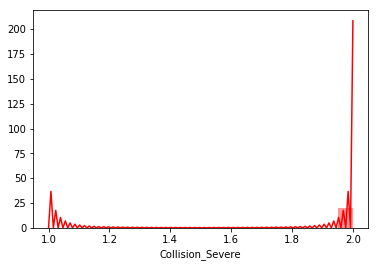

In [38]:
Collision_fatalities = 'Collision_Severe'
sns.distplot(TrainingData[Collision_fatalities], bins=20,color='red')
TrainingData[Collision_fatalities].value_counts()
MeanOfTrainingData = TrainingData.groupby(Collision_fatalities).mean()
MeanOfTrainingData.to_clipboard(index=True,header=True)

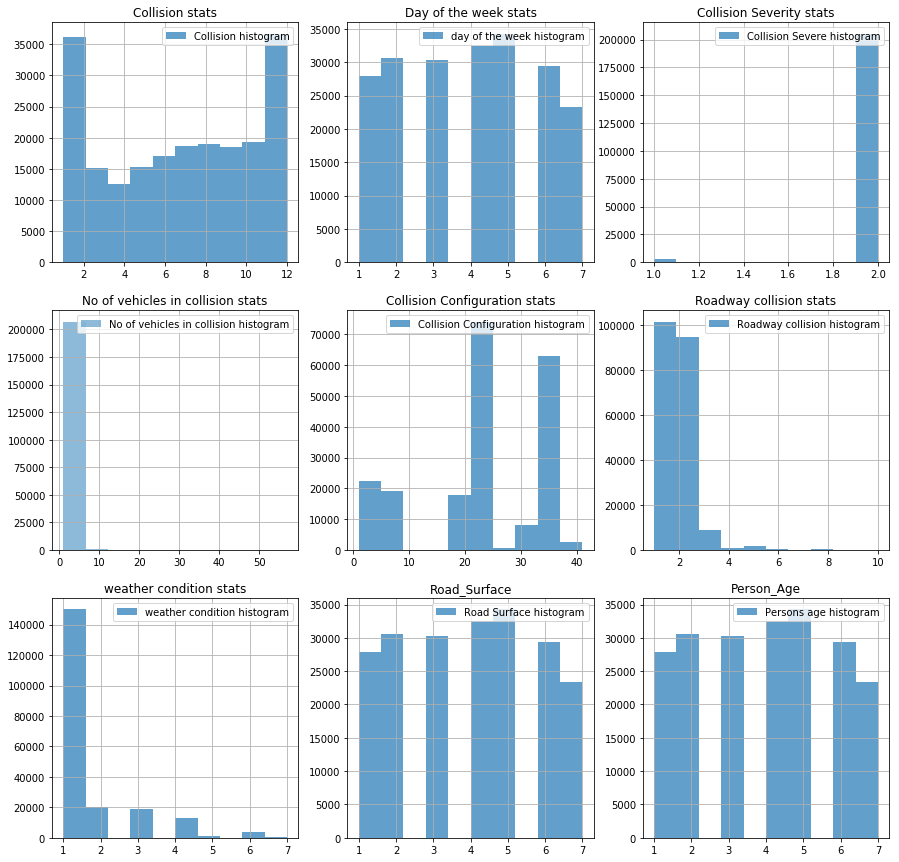

In [39]:
#Visualising the data
#Visualize data . The goal is to give an idea of how other variable graphs looks like which might be of significance in the future
#collision monthwise
fig = plt.figure(figsize=(15,15))
FirstGraph = fig.add_subplot(331)
FirstGraph.set_title("Collision stats")
Collision_Data = TrainingData['Collision_Month'].astype(int)
Collision_Data.hist(alpha=0.7,label = 'Collision histogram')
FirstGraph.legend(loc='upper right')

#Day Of the week
SecondGraph = fig.add_subplot(332)
SecondGraph.set_title("Day of the week stats")
WeekDay_Data = TrainingData['Day_of_the_week'].astype(int)
WeekDay_Data.hist(alpha=0.7,label = 'day of the week histogram')
SecondGraph.legend(loc='upper right')

#Collision_Severity
ThirdGraph = fig.add_subplot(333)
ThirdGraph.set_title("Collision Severity stats")
Collision_Severity = TrainingData['Collision_Severe'].astype(int)
Collision_Severity.hist(alpha=0.7,label = 'Collision Severe histogram')
ThirdGraph.legend(loc='upper right')

#No of vehicles in collision
ForthGraph = fig.add_subplot(334)
ForthGraph.set_title("No of vehicles in collision stats")
No_of_vehicles_in_collision = TrainingData['No_of_vehicles_in_collision'].astype(int)
No_of_vehicles_in_collision.hist(alpha=0.5,label = 'No of vehicles in collision histogram')
ForthGraph.legend(loc='upper right')

#Collision Configuration
FifthGraph = fig.add_subplot(335)
FifthGraph.set_title("Collision Configuration stats")
Collision_Configuration = TrainingData['Collision_Configuration'].astype(int)
Collision_Configuration.hist(alpha=0.7,label = 'Collision Configuration histogram')
FifthGraph.legend(loc='upper right')

#Roadway collision
SixthGraph = fig.add_subplot(336)
SixthGraph.set_title("Roadway collision stats")
Roadway_collision = TrainingData['Roadway_collision'].astype(int)
Roadway_collision.hist(alpha=0.7,label = 'Roadway collision histogram')
SixthGraph.legend(loc='upper right')

#weather condition
SeventhGraph = fig.add_subplot(337)
SeventhGraph.set_title("weather condition stats")
weather_condition = TrainingData['weather_condition'].astype(int)
weather_condition.hist(alpha=0.7,label = 'weather condition histogram')
SeventhGraph.legend(loc='upper right')

#Road Surface
EighthGraph = fig.add_subplot(338)
EighthGraph.set_title("Road_Surface")
Road_Surface = TrainingData['Day_of_the_week'].astype(int)
Road_Surface.hist(alpha=0.7,label = 'Road Surface histogram')
EighthGraph.legend(loc='upper right')

#Person Age
NinthGraph = fig.add_subplot(339)
NinthGraph.set_title("Person_Age")
WeekDay_Data = TrainingData['Day_of_the_week'].astype(int)
WeekDay_Data.hist(alpha=0.7,label = 'Persons age histogram')
NinthGraph.legend(loc='upper right')



### Focusing on weather condition

Let us first list the code and corresponding condition

Code	Description
1.	Clear and sunny
2.	Overcast, cloudy but no precipitation
3.	Raining
4.	Snowing, not including drifting snow
5.	Freezing rain, sleet, hail
6.	Visibility limitation	e.g. drifting snow, fog, smog, dust, smoke, mist
7.	Strong wind
8. Q	Choice is other than the preceding values
9. U	Unknown
10. X	Jurisdiction does not provide this data element


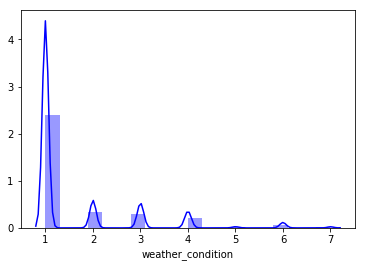

In [57]:
#weather condition

sns.distplot(TrainingData['weather_condition'].astype(int), bins=20,color='blue')

plt.show()

### We are defining the features and labels (the ground truth is the weather condition ).
We also have to ignore the person sex as it is a catogorical value

In [96]:
#We define the features on which the processing should be done and divide them into training and testing data
Features =[]
Weather_Cond = 'weather_condition'
for each in ColumnsName :
    if (each != Weather_Cond and each != 'Person_Sex'):
        
        Features.append(each)
X_train = TrainingData[Features].astype(int)
Y_train = TrainingData[Weather_Cond].astype(int)
X_Test = TestingData[Features].astype(int)
Y_Test = TestingData[Weather_Cond].astype(int)


#### Some default function used in the future

In [102]:
def Importance(Input_Parameter):
    importances=Input_Parameter.feature_importances_
    f=np.argsort(importances)[::-1]
    print ('feature ranking:')
    for i in range(X_train.shape[1]):
         print ("feature no. {}: {} ({})".format(i+1,X_train.columns[f[i]],importances[f[i]]))

#Plotting the confusion matrix
#plotting confusion matrix
def ConfMat(confusionMatrix):
    norm_conf = []
    for i in confusionMatrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)
    fig = plt.figure()
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet,interpolation='nearest')
    width, height = confusionMatrix.shape

    for x in range(width):
        for y in range(height):
            ax.annotate(str(confusionMatrix[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    cb = fig.colorbar(res)
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    plt.xticks(range(width), alphabet[:width])
    plt.yticks(range(height), alphabet[:height])
    plt.show()


#### We start by creating model
1. We start with logistic regression 
2. We find the accuracy score, precision,recall 
3. We also plot the confusion matrix

In [97]:

#we first take the mean out
Mean = TrainingData[Weather_Cond].astype(int).mean()
print ("the mean of the data is {}".format(Mean))
logistic = LogisticRegression()



#We now implement the logistic regression model
Logistic_fit = logistic.fit(X_train,Y_train)
Prediction_Model = Logistic_fit.predict(X_train)
score =accuracy_score(Y_train,Prediction_Model)

importance = Logistic_fit.coef_

print ("The accuracy score is :" + str(score*100) + "\n")

#now finding the classification report
print(classification_report(Y_train, Prediction_Model))

#now we do cross validation just to check if the model does not overfit
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(logistic, X_train, Y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

the mean of the data is 1.6056699051495718


C:\Users\shreyas prasadh\Anaconda-3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shreyas prasadh\Anaconda-3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The accuracy score is :69.70930455819669



C:\Users\shreyas prasadh\Anaconda-3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\shreyas prasadh\Anaconda-3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\shreyas prasadh\Anaconda-3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.74      0.95      0.83    150029
           2       0.33      0.00      0.00     20520
           3       0.03      0.01      0.01     19074
           4       0.19      0.14      0.16     12959
           5       0.00      0.00      0.00       899
           6       0.52      0.03      0.05      4045
           7       0.00      0.00      0.00       802

   micro avg       0.70      0.70      0.70    208328
   macro avg       0.26      0.16      0.15    208328
weighted avg       0.59      0.70      0.61    208328



C:\Users\shreyas prasadh\Anaconda-3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shreyas prasadh\Anaconda-3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\shreyas prasadh\Anaconda-3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shreyas prasadh\Anaconda-3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\shreyas prasadh\Anaconda-3\lib\site-packages\sklearn\

10-fold cross validation average accuracy: 0.697


#### Plotting the cofusion matrix

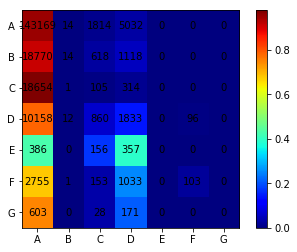

In [103]:
confusionMatrixLog = metrics.confusion_matrix(Y_train,Prediction_Model)
ConfMat(confusionMatrixLog)

##### This is feature importance

In [ ]:
#We also find the importance 
rfe = RFE(logistic,15)
rfe = rfe.fit(X_train,Y_train)
print(rfe.support_)
print(rfe.ranking_)

#### ROC and AUC curve

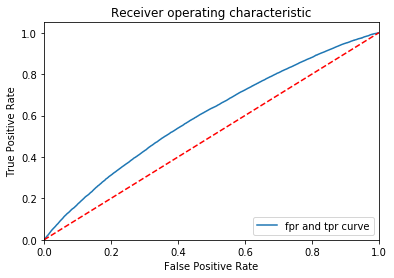

In [105]:
#this is the roc curve  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#ff = roc_curve(Y_train, Prediction_Model)
#logit_roc_auc = roc_auc_score(Y_train, Prediction_Model,pos_label = 2)
fpr, tpr, thresholds = roc_curve(Y_train, logistic.predict_proba(X_train)[:,1],pos_label = 2)
plt.figure()
plt.plot(fpr, tpr,label = 'fpr and tpr curve')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Decision Tree
we can see the logistic regression does not give any good results 
Let us try decision tree

In [106]:
#We define a function to show the tree structure
def show_tree(tree,features,path):  
    f = StringIO.StringIO()
    export_graphviz(tree,out_file=f,feature_names = features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams['figure.figsize'] = [20,20]
    plt.imshow(img)

In [108]:
# Applying Decision tree algorithm 

Decision_tree = tree.DecisionTreeClassifier(min_samples_split = 10)
DecisionTree = Decision_tree.fit(X_train,Y_train)
Prediction_Model = DecisionTree.predict(X_train)
score =accuracy_score(Y_train,Prediction_Model)
print ("Train score is " + str(score*100))
Importance(DecisionTree)
#show_tree(DecisionTree,Features,'sample1.png')

Train score is 91.40393994086249
feature ranking:
feature no. 1: Road_Surface (0.3571062903785839)
feature no. 2: Collision_Hour (0.09976041351670714)
feature no. 3: Collision_Month (0.08150120000062423)
feature no. 4: Person_Age (0.07641765186802145)
feature no. 5: Vehicle_Year_ Model (0.07202197952658085)
feature no. 6: Day_of_the_week (0.06371171562063593)
feature no. 7: Collision_Configuration (0.06026127653443533)
feature no. 8: No_of_vehicles_in_collision (0.03578912102977827)
feature no. 9: Traffic_control (0.033029629967192796)
feature no. 10: Road_Alignment (0.029997827862402633)
feature no. 11: Roadway_collision (0.024518121346660766)
feature no. 12: Vehicle_Type (0.015339860565455344)
feature no. 13: Safety_Device_Required (0.012779900169762283)
feature no. 14: Person_Position (0.009059617008999293)
feature no. 15: Vehicle_ ID (0.007858337763931468)
feature no. 16: Person_ID (0.0075010566768031585)
feature no. 17: Medical_Treatment_required (0.005939726961476716)
feature no.

The decision tree gives a good score of 91% . LEt us try that on the testing data

In [110]:
fit_For_test = Decision_tree.fit(X_Test,Y_Test) 
predict_test = fit_For_test.predict(X_Test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic.score(X_Test, Y_Test)))
print(classification_report(Y_Test, predict_test))

Accuracy of logistic regression classifier on test set: 0.70
              precision    recall  f1-score   support

           1       0.93      0.97      0.95     64439
           2       0.76      0.61      0.68      8601
           3       0.88      0.88      0.88      8034
           4       0.82      0.75      0.78      5647
           5       0.70      0.46      0.56       379
           6       0.78      0.55      0.64      1850
           7       0.76      0.29      0.42       334

   micro avg       0.90      0.90      0.90     89284
   macro avg       0.80      0.64      0.70     89284
weighted avg       0.89      0.90      0.90     89284



The above is overfitting the data. This is one of the most common problems in machine learning 